In [5]:
data="C:\\MLOPS\\4-Ridge Lasso And Elasticnet\\Ridge Lassso Elastic Regression Practicals\\Algerian_forest_fires_dataset_UPDATE.csv"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
dataset=pd.read_csv(data,header=1)
columns=[]

In [15]:
dataset.columns=['index','day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes','Region']
dataset.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [16]:
emp=dataset.isnull().any(axis=1)

In [17]:
dataset[emp]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [18]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [19]:
df[["Region"]]=df[["Region"]].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        242 non-null    int64  
 1   day          242 non-null    int64  
 2   month        242 non-null    int64  
 3   year         242 non-null    int64  
 4   Temperature  242 non-null    int64  
 5   RH           242 non-null    int64  
 6   Ws           242 non-null    int64  
 7   Rain         242 non-null    float64
 8   FFMC         242 non-null    float64
 9   DMC          242 non-null    float64
 10  DC           242 non-null    float64
 11  ISI          242 non-null    float64
 12  BUI          242 non-null    float64
 13  FWI          242 non-null    float64
 14  Classes      242 non-null    object 
 15  Region       242 non-null    int32  
dtypes: float64(7), int32(1), int64(7), object(1)
memory usage: 29.4+ KB


In [21]:
df.tail()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
241,242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [22]:
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [23]:
df=df.dropna().reset_index(drop=True)

In [24]:
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [25]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [26]:
df=df.drop(122).reset_index(drop=True)

In [27]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [28]:
df.columns=df.columns.str.strip()

In [29]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        241 non-null    int64  
 1   day          241 non-null    int64  
 2   month        241 non-null    int64  
 3   year         241 non-null    int64  
 4   Temperature  241 non-null    int64  
 5   RH           241 non-null    int64  
 6   Ws           241 non-null    int64  
 7   Rain         241 non-null    float64
 8   FFMC         241 non-null    float64
 9   DMC          241 non-null    float64
 10  DC           241 non-null    float64
 11  ISI          241 non-null    float64
 12  BUI          241 non-null    float64
 13  FWI          241 non-null    float64
 14  Classes      241 non-null    object 
 15  Region       241 non-null    int32  
dtypes: float64(7), int32(1), int64(7), object(1)
memory usage: 29.3+ KB


In [31]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        241 non-null    int64  
 1   day          241 non-null    int32  
 2   month        241 non-null    int32  
 3   year         241 non-null    int32  
 4   Temperature  241 non-null    int32  
 5   RH           241 non-null    int32  
 6   Ws           241 non-null    int32  
 7   Rain         241 non-null    float64
 8   FFMC         241 non-null    float64
 9   DMC          241 non-null    float64
 10  DC           241 non-null    float64
 11  ISI          241 non-null    float64
 12  BUI          241 non-null    float64
 13  FWI          241 non-null    float64
 14  Classes      241 non-null    object 
 15  Region       241 non-null    int32  
dtypes: float64(7), int32(7), int64(1), object(1)
memory usage: 23.7+ KB


In [37]:
df_copy=df.drop(['index','day','month','year'],axis=1)

In [42]:
df_copy['Classes'].value_counts()

1    137
0    104
Name: Classes, dtype: int64

In [41]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [44]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


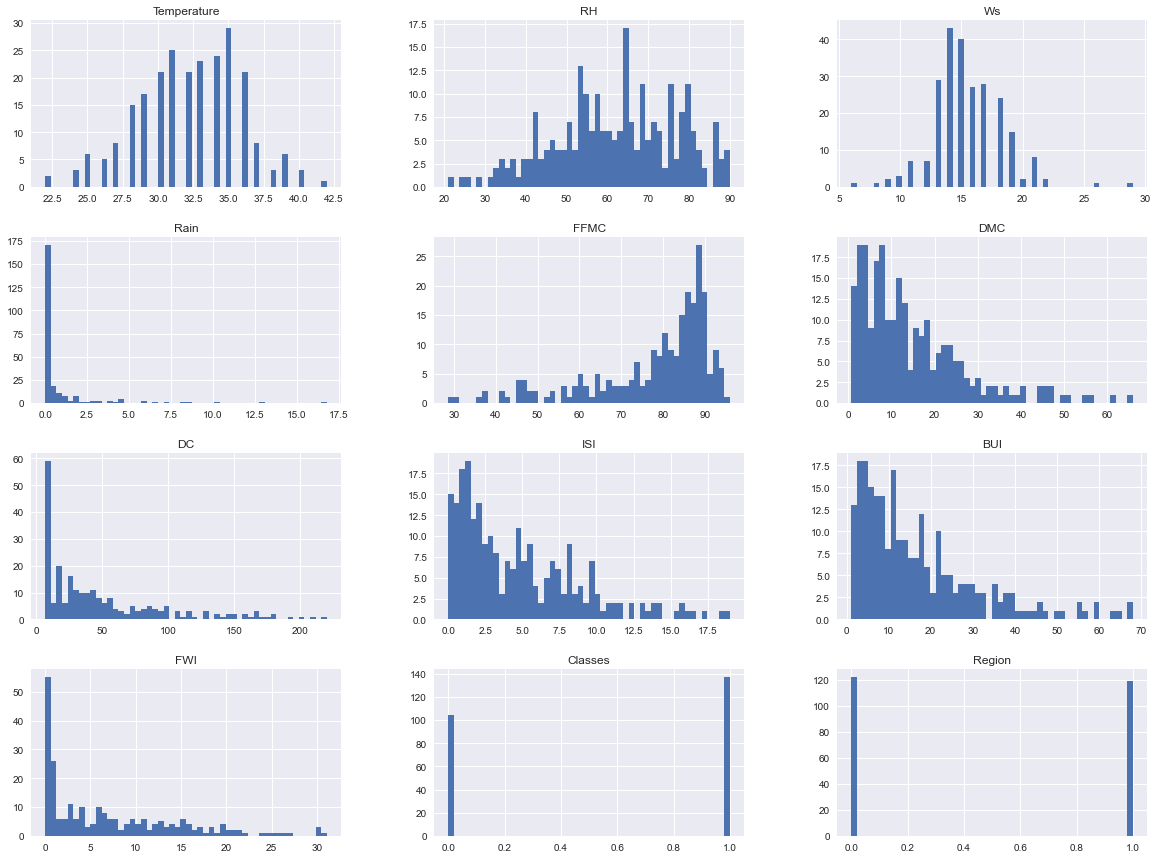

In [48]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

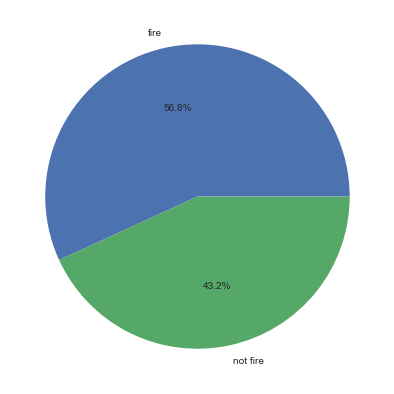

In [54]:
perc=df_copy['Classes'].value_counts(normalize=True)*100
classs=['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(perc,labels=classs,autopct='%1.1f%%')
plt.show()

In [55]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.653199,-0.285072,-0.326485,0.675607,0.482889,0.372999,0.601901,0.456790,0.564420,0.513041,0.270596
RH,-0.653199,1.000000,0.249165,0.218425,-0.646394,-0.408895,-0.226529,-0.688126,-0.354002,-0.582130,-0.433194,-0.414437
Ws,-0.285072,0.249165,1.000000,0.180452,-0.170747,-0.000918,0.079681,0.007983,0.031549,0.032451,-0.070552,-0.164804
Rain,-0.326485,0.218425,0.180452,1.000000,-0.541466,-0.286398,-0.296173,-0.345272,-0.297632,-0.322559,-0.377438,-0.048531
FFMC,0.675607,-0.646394,-0.170747,-0.541466,1.000000,0.600261,0.503545,0.738023,0.588505,0.688893,0.767261,0.239708
DMC,0.482889,-0.408895,-0.000918,-0.286398,0.600261,1.000000,0.875087,0.678161,0.982116,0.874991,0.582045,0.202112
DC,0.372999,-0.226529,0.079681,-0.296173,0.503545,0.875087,1.000000,0.505368,0.941607,0.737805,0.507187,-0.072059
ISI,0.601901,-0.688126,0.007983,-0.345272,0.738023,0.678161,0.505368,1.000000,0.641509,0.922380,0.733066,0.274318
BUI,0.456790,-0.354002,0.031549,-0.297632,0.588505,0.982116,0.941607,0.641509,1.000000,0.856964,0.582970,0.098486
FWI,0.564420,-0.582130,0.032451,-0.322559,0.688893,0.874991,0.737805,0.922380,0.856964,1.000000,0.716981,0.206496


<AxesSubplot:>

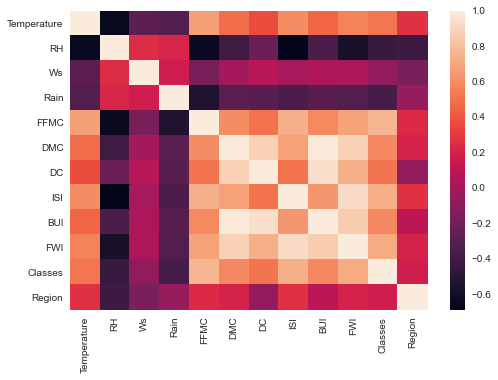

In [57]:
sns.heatmap(df_copy.corr())

In [58]:
df_new=df_copy

In [59]:
df_new.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [69]:
X=df_new.drop('FWI',axis=1)
y=df_new['FWI']

In [70]:
y.head()

0    0.4
1    0.1
2    0.0
3    0.5
4    2.5
Name: FWI, dtype: float64

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge,LassoCV
from sklearn.metrics import mean_absolute_error,r2_score

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [87]:
X_train.shape,X_test.shape


((180, 11), (61, 11))

In [88]:
scaler=StandardScaler()

In [89]:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [90]:
X_test_sc

array([[-2.93496276e-01,  8.99765615e-02,  9.12242879e-01,
        -3.58139761e-01,  6.27532961e-01,  2.62307124e-01,
         4.89844050e-01,  4.73665180e-01,  3.49739967e-01,
         9.04534034e-01, -9.78019294e-01],
       [-5.57642923e-01,  6.82505137e-01, -2.07327927e-01,
        -3.58139761e-01,  6.13739344e-01, -2.00906489e-01,
        -2.23572761e-01,  2.10665444e-01, -2.20513748e-01,
         9.04534034e-01, -9.78019294e-01],
       [-2.93496276e-01,  6.16668629e-01, -5.80518196e-01,
        -3.58139761e-01,  4.48215935e-01, -5.09715564e-01,
        -5.02550678e-01, -2.19697759e-01, -5.30281198e-01,
         9.04534034e-01,  1.02247472e+00],
       [ 7.63090316e-01, -6.34225031e-01,  5.39052610e-01,
        -1.19025677e-01,  1.72343586e-01,  4.97977207e-01,
         2.13815632e+00, -4.82697494e-01,  9.83355206e-01,
         9.04534034e-01,  1.02247472e+00],
       [-5.57642923e-01,  1.55813070e-01, -5.80518196e-01,
        -3.58139761e-01,  5.30977639e-01,  1.16029141e-01,
  

In [98]:
lr=LinearRegression()
lr.fit(X_train_sc,y_train)
y_pred=lr.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
print("R2:",r2_score(y_test,y_pred))
print("MAE is:",mae)

R2: 0.9853740097555919
MAE is: 0.6091468287740605


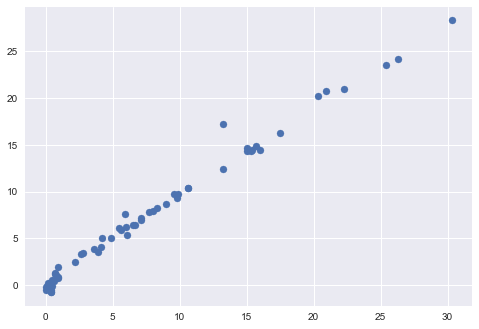

In [99]:
plt.scatter(y_test,y_pred)

R2: 0.9510660754919881
MAE is: 1.1897267502013054


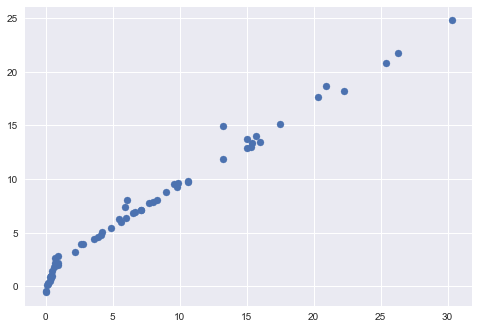

In [108]:
lr=Lasso()
lr.fit(X_train_sc,y_train)
y_pred=lr.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
print("R2:",r2_score(y_test,y_pred))
print("MAE is:",mae)
plt.scatter(y_test,y_pred)

R2: 0.9834713866519296
MAE is: 0.639633385913725


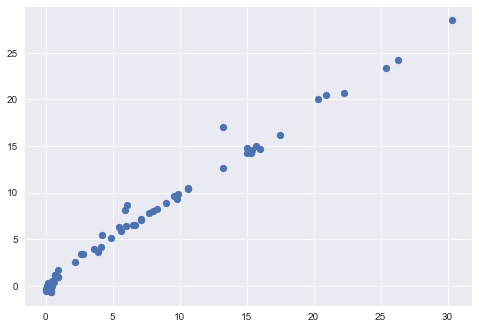

In [107]:
lr=Ridge()
lr.fit(X_train_sc,y_train)
y_pred=lr.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
print("R2:",r2_score(y_test,y_pred))
print("MAE is:",mae)
plt.scatter(y_test,y_pred)

R2: 0.8941328227240914
MAE is: 1.7844976962539396


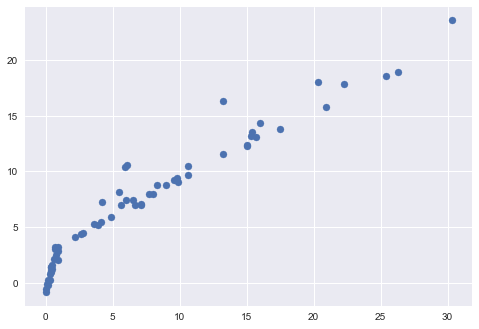

In [109]:
lr=ElasticNet()
lr.fit(X_train_sc,y_train)
y_pred=lr.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
print("R2:",r2_score(y_test,y_pred))
print("MAE is:",mae)
plt.scatter(y_test,y_pred)

R2: 0.9855642608162141
MAE is: 0.614405614220551


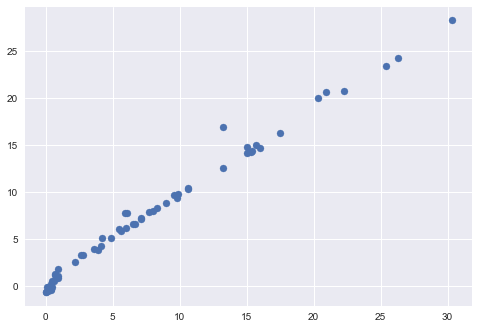

In [117]:
lassoCV=LassoCV(cv=5)
lassoCV.fit(X_train_sc,y_train)
y_pred=lassoCV.predict(X_test_sc)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("R2:",r2_score(y_test,y_pred))
print("MAE is:",mae)